# 진행 방식
---
1. 데이터셋 확인
> NULL Data를 확인하고 후에 수정한다.
2. 탐색적 데이터 분석 (EDA)
> feature들을 개별적으로 분석하고, feature들 간의 상관관계를 확인한다.
이 때 시각화 툴을 활용하여 insight를 얻을 수 있다.
3. Feature engineering
> 모델 성능을 높이기 위해 engineering 한다. 예시로는 One- hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등이 있다.
4. model 만들기
> tensorflow, pytorch, sklearn과 같은 모델을 형성한다.
5. 모델 학습 및 예측
> trainset을 통해 학습시킨 후, testset으로 prediction을 진행한다.
6. 모델 평가
> 예측 성능을 확인하고, 학습된 모델이 어떤 것을 학습하였는지 확인한다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib의 스타일을 커스터마이징할 수 있는 stylesheet.
plt.style.use('seaborn') 
#일일이 font_size를 지정할 필요 없이 한 번에 지정할 수 있다.
sns.set(font_scale=2.5)

# null data를 쉽게 보여줄 수 있는 라이브러리
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_34/1161338304.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


* [style.use 자료](https://hong-yp-ml-records.tistory.com/88)

# 1. Dataset 확인

In [3]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Feature
    1. Pclass : 1=1st,2=2st으로 categorical feature
    2. Age: continous한 값
    3. SibSp : 함께 탑승한 배우자와 형제의 수
    4. Parch : 함께 탑승한 부모와 아이의 수
    5. Ticket : 티켓 번호 (alphabat + integer)
    6. Fare : 요금
    7. Cabin : 객실 번호 (alphabat + integer)
    8. Embarked : 탑승 항구 (categorical 하지만 순서가 의미 x)
* Class
    1. Survived : 0 - NO, 1 - YES

In [5]:
train.describe()
# Age 속성의 count 수가 다른 것을 보아 Null data 존재!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 NULL DATA CHECK

### NULL 값을 수식을 통해 출력하는 방법

In [7]:
for col in train.columns:
    msg=' column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(train[col].isnull().sum()/train[col].shape[0]))

    print(msg)

 column: PassengerId	 Percent of NaN value: 0.00%
 column:   Survived	 Percent of NaN value: 0.00%
 column:     Pclass	 Percent of NaN value: 0.00%
 column:       Name	 Percent of NaN value: 0.00%
 column:        Sex	 Percent of NaN value: 0.00%
 column:        Age	 Percent of NaN value: 19.87%
 column:      SibSp	 Percent of NaN value: 0.00%
 column:      Parch	 Percent of NaN value: 0.00%
 column:     Ticket	 Percent of NaN value: 0.00%
 column:       Fare	 Percent of NaN value: 0.00%
 column:      Cabin	 Percent of NaN value: 77.10%
 column:   Embarked	 Percent of NaN value: 0.22%


* format 함수: 원하는 형식으로 구성된 문자열을 생성함.
    * {}: 괄호는 삽입할 자리의 표시. 이 때 :는 중괄호 안에 포맷팅           옵션을 도입
    * {>10} : 오른쪽으로 정렬하고 너비는 10자
    * .2f: 소수점 둘 째자리까지 백분율 값 표시
    

In [8]:
for col in test.columns:
    msg=' column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(test[col].isnull().sum()/test[col].shape[0]))

    print(msg)

 column: PassengerId	 Percent of NaN value: 0.00%
 column:     Pclass	 Percent of NaN value: 0.00%
 column:       Name	 Percent of NaN value: 0.00%
 column:        Sex	 Percent of NaN value: 0.00%
 column:        Age	 Percent of NaN value: 20.57%
 column:      SibSp	 Percent of NaN value: 0.00%
 column:      Parch	 Percent of NaN value: 0.00%
 column:     Ticket	 Percent of NaN value: 0.00%
 column:       Fare	 Percent of NaN value: 0.24%
 column:      Cabin	 Percent of NaN value: 78.23%
 column:   Embarked	 Percent of NaN value: 0.00%


train data에서는 Age, Cabin, Embarked 속성에서 Null data가 존재.
test data에서는 Age, Fare, Cabin 속성에서 Null data가 존재한다.

### msno 함수를 통해 null data를 시각화하는 방법

<AxesSubplot: >

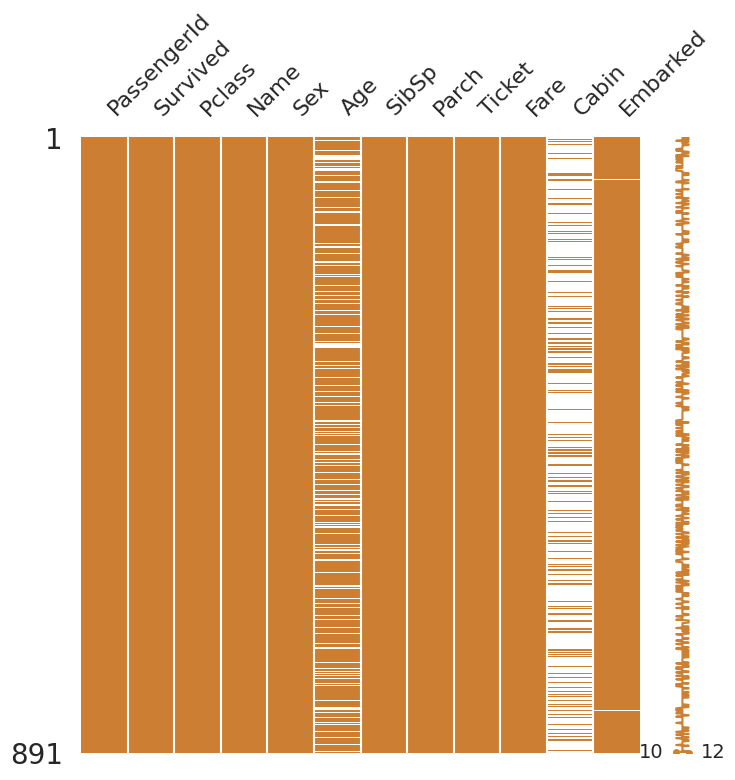

In [9]:
msno.matrix(df=train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

<AxesSubplot: >

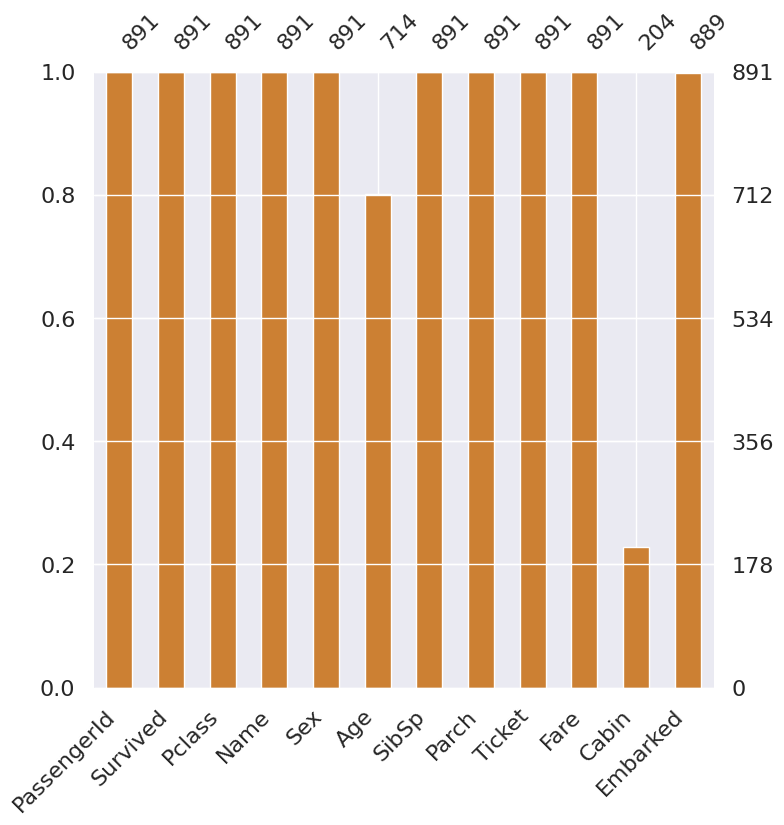

In [10]:
msno.bar(df=train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

<AxesSubplot: >

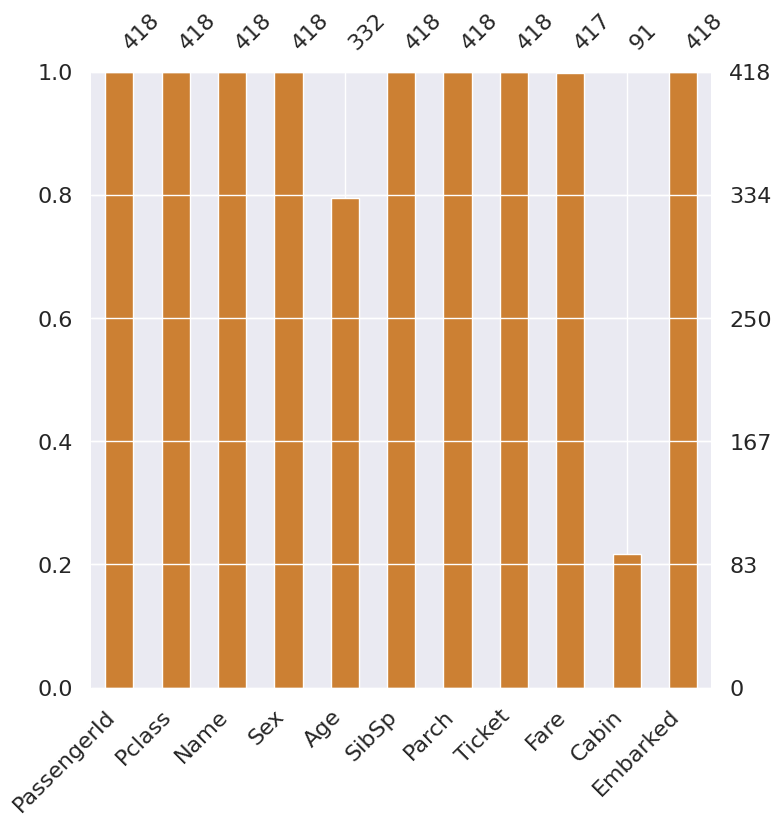

In [11]:
msno.bar(df=test.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

# 1.2 Target label 확인
> Target label이 어떠한 분포를 갖고 있는지에 따라 모델의 평가 방법이 달라짐. 예를 들어, 데이터 100개 중 1만 99개라면, 모델이 편향을 갖고 전부 1이라고 예측해도 정확도가 높아지는 일이 발생함. 해당 데이터에서는 비교적 balanced한 분포를 가지고 있음.

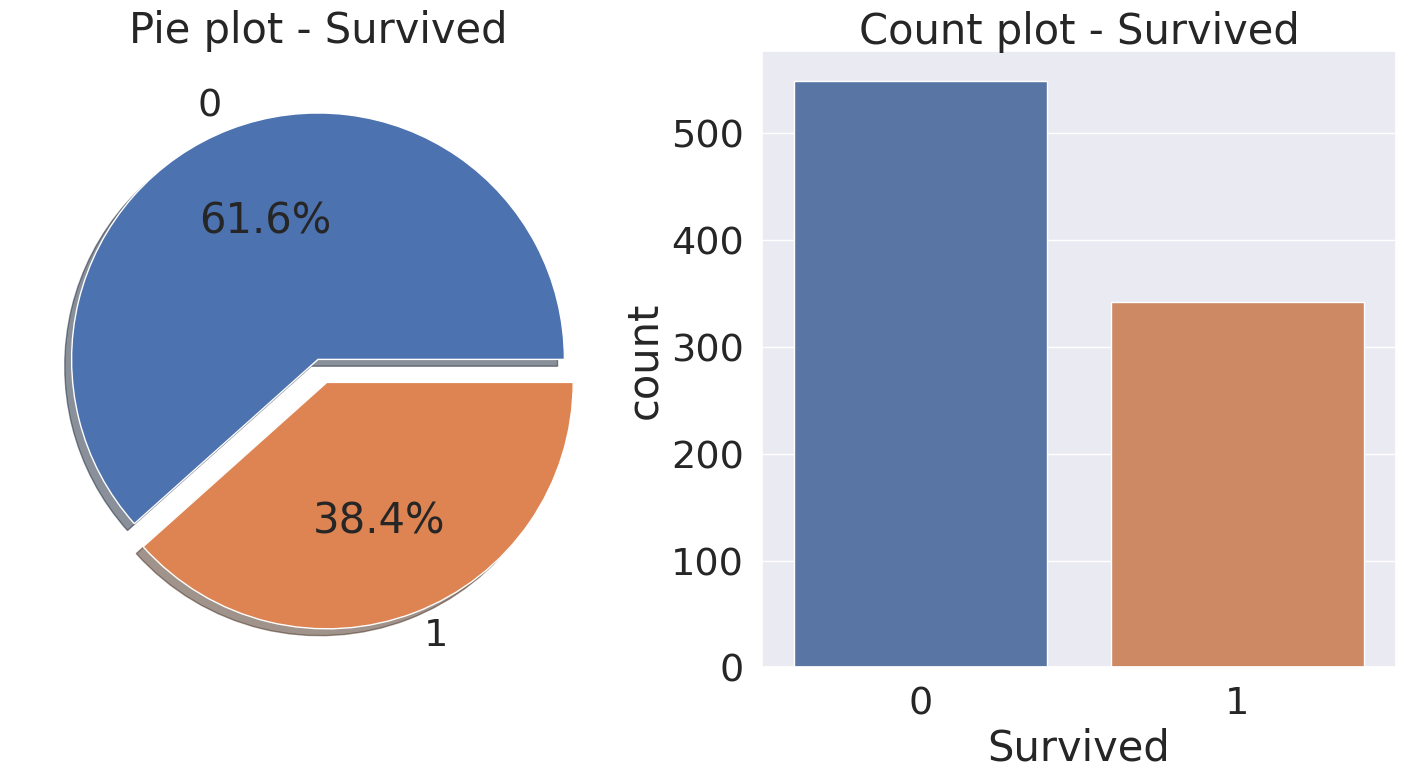

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8)) #큰 틀 안에 도화지를 준비.

train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('') #lable을 없애겠다.

sns.countplot(x='Survived',data=train,ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

* subplot : 큰 틀 안에 도화지를 준비함 
    * 1,2 : (row, column)으로 안에 나눠지는 칸 수
    * figsize : 도화지 사이즈
* value_counts : 값별로 개수를 카운트함
* pie
    * explode : 원 사이를 벌려놓음
    * autopct : 원을 퍼센테이지로 나타냄.
    * ax : 어디에 위치할 것인지
* countplot : 각 카테고리의 counts를 보여주는 그래프
    * x ; data의 어떤 variable를 확인    
    [countplot 설명](https://seaborn.pydata.org/generated/seaborn.countplot.html)    

# 2. EDA
---

## 2.1 Pclass 

In [ ]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


* crosstab
> 두 개이상 factors 사이의 간단한 관계표를 형성한다.
    * margins : subtotal들을 구한다.
* style.background_gradient : background 색상을 형성한다.
    * cmpa : matplotlib colormap


In [18]:
pd.crosstab(train['Pclass'],train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot: xlabel='Pclass'>

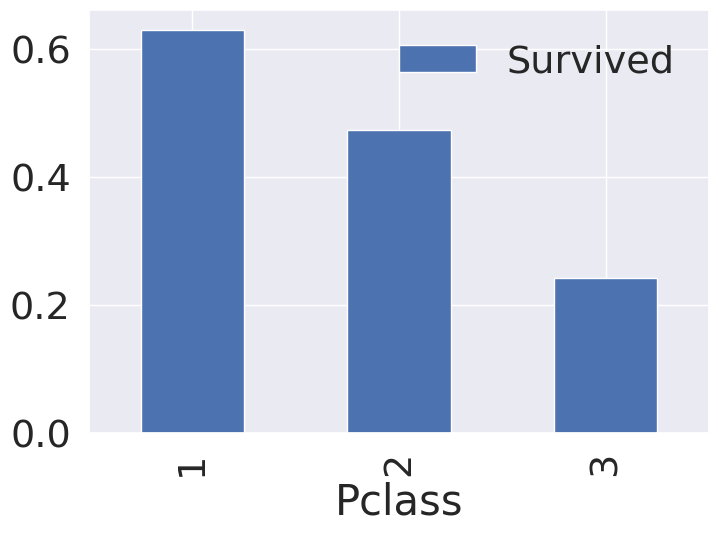

In [24]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

각 grouped 별로 mean()을 구하여, 클래스 별 생존률을 알 수 있다. 
이 때 그래프를 통해 Pclass가 좋을 수록 생존률이 높다는 것을 확인할 수 있다.

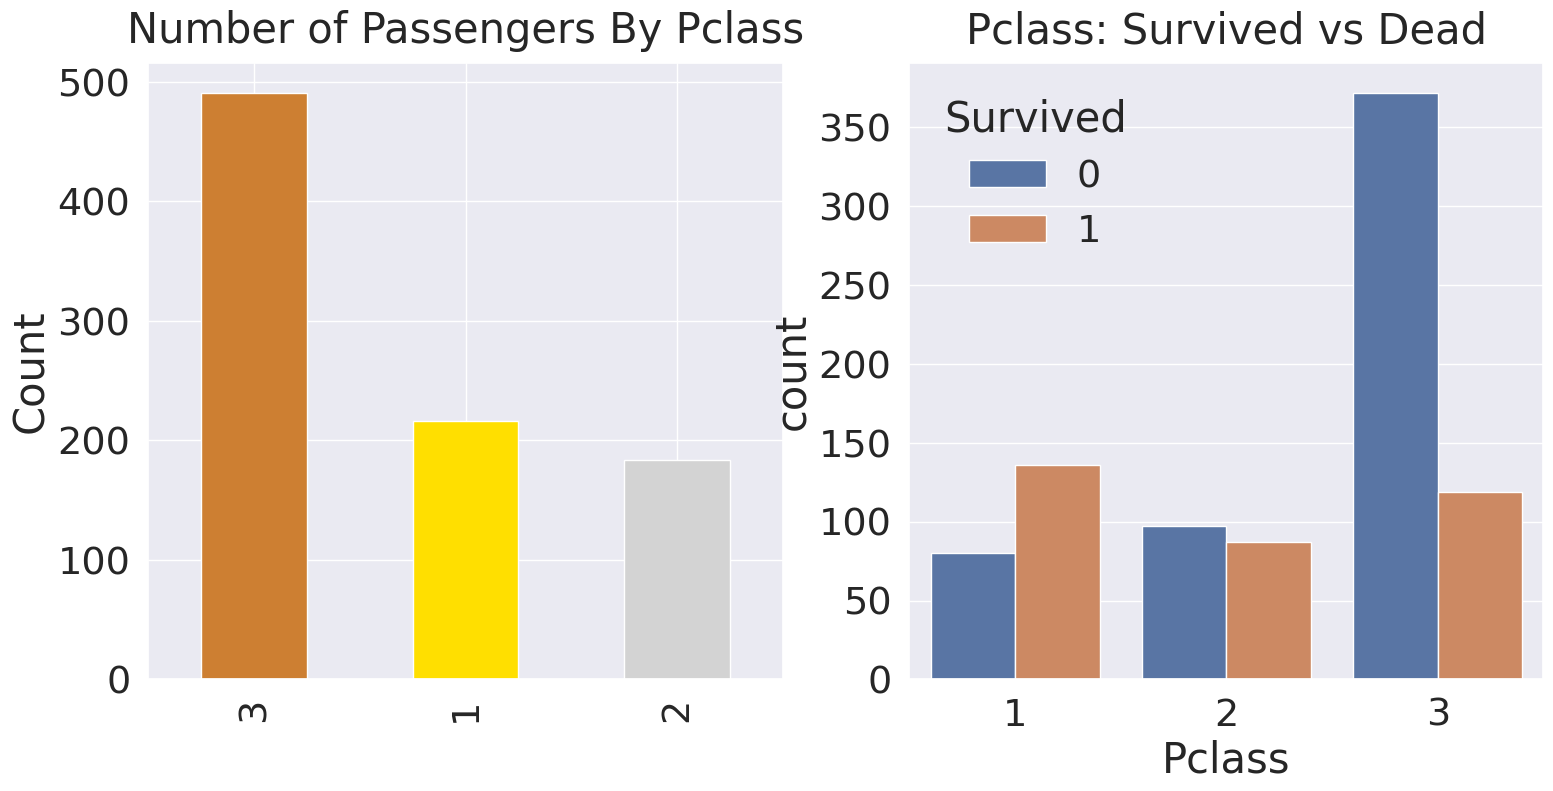

In [40]:
y_position=1.02
f,ax=plt.subplots(1,2,figsize=(18,8)) #도화지 설정 

#Pclass 별 개수를 표로 나타냄
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0]) 
ax[0].set_title('Number of Passengers By Pclass',y=y_position) #y: title의 y축 방향의 위치를 설정
ax[0].set_ylabel('Count')

#Pclass 별 Survived 카테고리 별로 개수 비교
sns.countplot(x='Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead',y=y_position)
plt.show()


### Feature 분석 결과
> 클래스가 높을 수록 생존 확률이 높다는 것을 확인할 수 있다. 따라서, Pclass와 생존 간의 연결성이 있다고 판단할 수 있으며, 모델을 세울 때 해당 피쳐를 사용하는 것이 좋다고 결론 지을 수 있다.

## 2.2 Sex
> 성별과 생존률 사이에 어떠한 관계가 있는지 확인해보자.

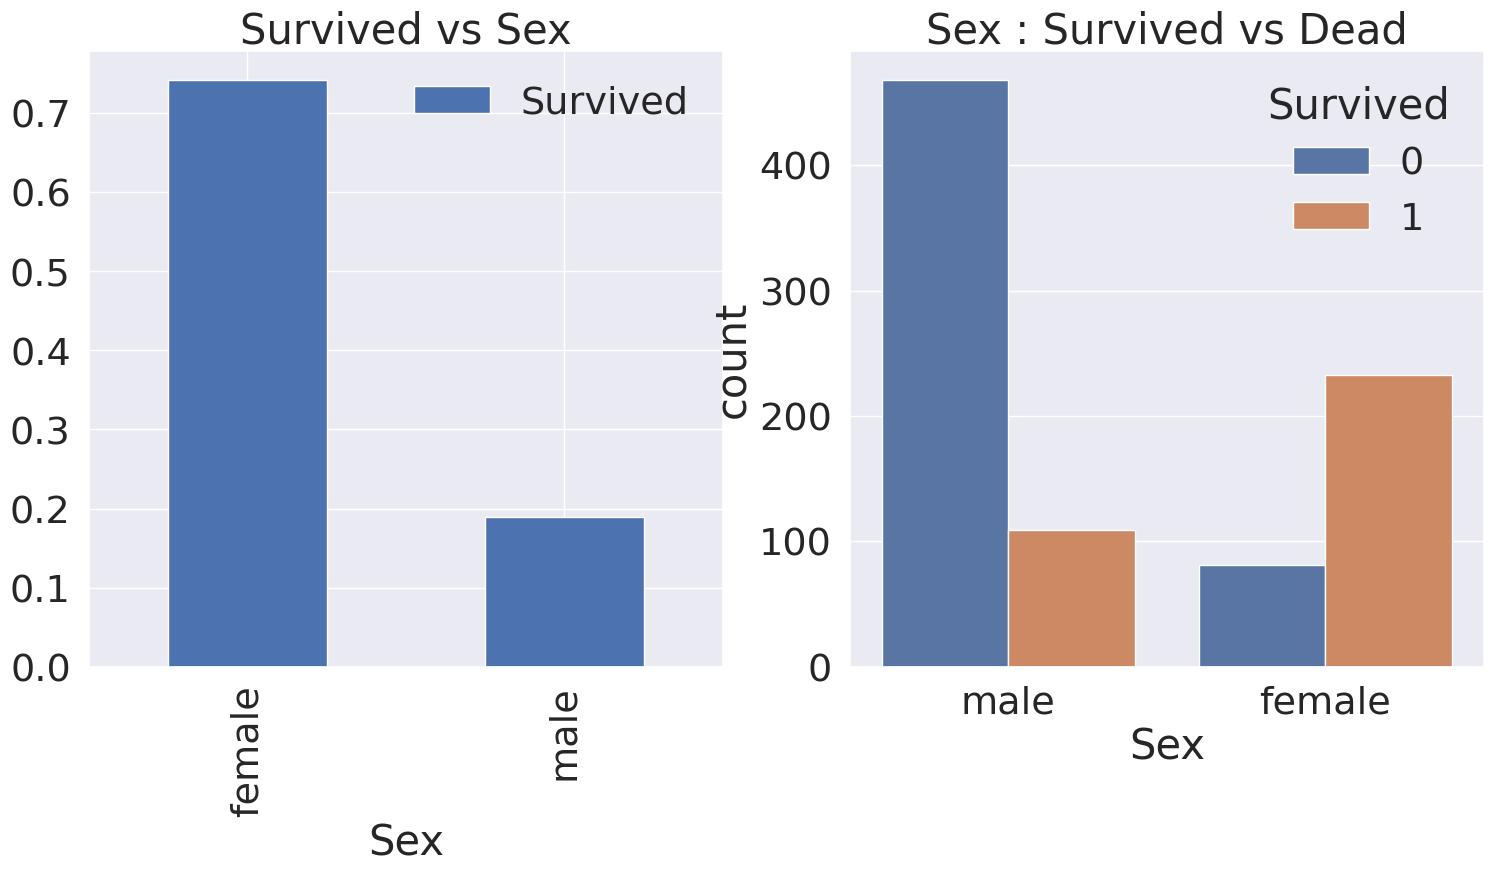

In [61]:
#도화지 설정
f,ax=plt.subplots(1,2,figsize=(18,8))

#Sex별 Survived 평균을 그래프로 나타냄.
train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

#Sex별 Survived에 따른 개수를 그래프로 나타냄.
sns.countplot(x='Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()


In [63]:
train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [65]:
pd.crosstab(train['Sex'],train['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### Feature 분석 결과
> 여성일 경우, 생존 확률이 높다는 것을 확인할 수 있다. 따라서, Sex와 생존 간의 연결성이 있다고 판단할 수 있으며, 모델을 세울 때 해당 피쳐를 사용하는 것이 좋다고 결론 지을 수 있다.

## 2.3 Both Sex and Pclass
> Sex와 Pclass에 따라 생존의 결과가 어떻게 달라지는 지 분석한다. 이 때 sns의 factorplot을 통해 3차원으로 이루어진 그래프를 확인할 수 있다.

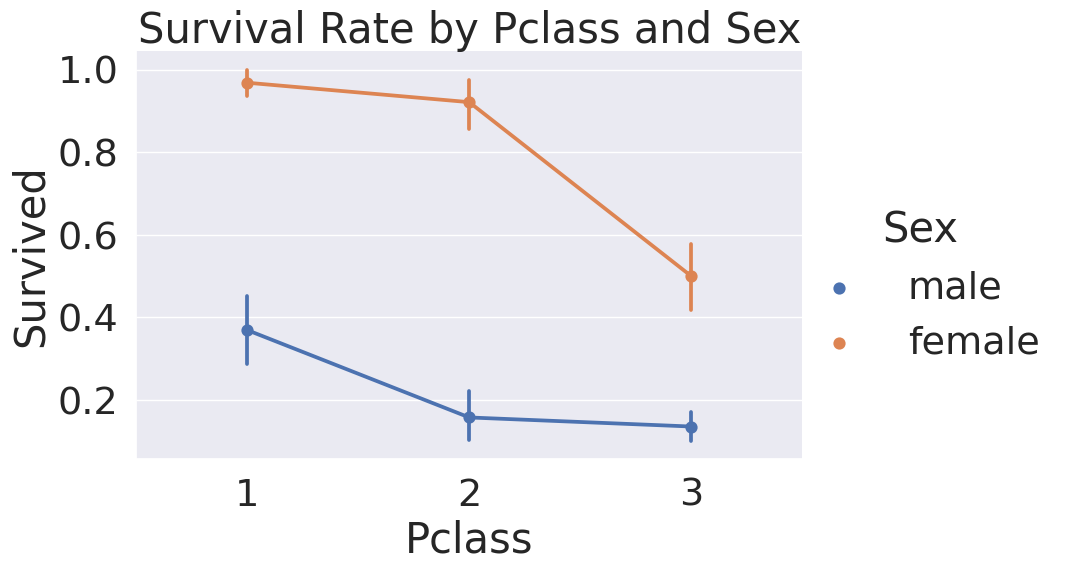

In [79]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='point', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.show()

* catplot : categoricals plot을 그리기 위해 유용한 함수 이다.
[catplot 설명서](https://seaborn.pydata.org/generated/seaborn.catplot.html)

### Feature 분석
> 클래스와 상관없이 여성일 경우, 생존 확률이 높았으며, 클래스가 높을 수록 생존 확률이 증가합니다.

## 2.4 Age

In [82]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(train['Age'].min()))
print('탑승객 나이의 평균 : {:.1f} Years'.format(train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 나이의 평균 : 29.7 Years


* kdeplot : 

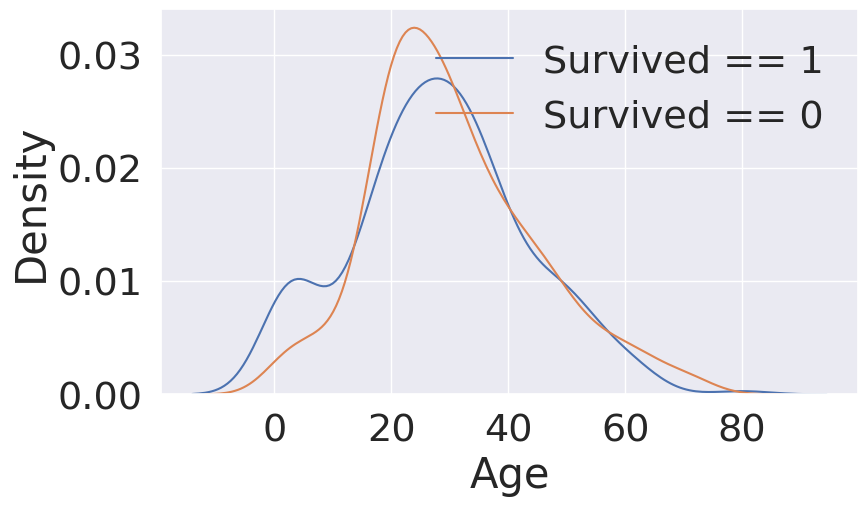

In [88]:
fig,ax=plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(train[train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(train[train['Survived']==0]['Age'],ax=ax)
plt.legend(['Survived == 1','Survived == 0'])
plt.show()

Age가 적을 수록 생존률이 올라갑니다.

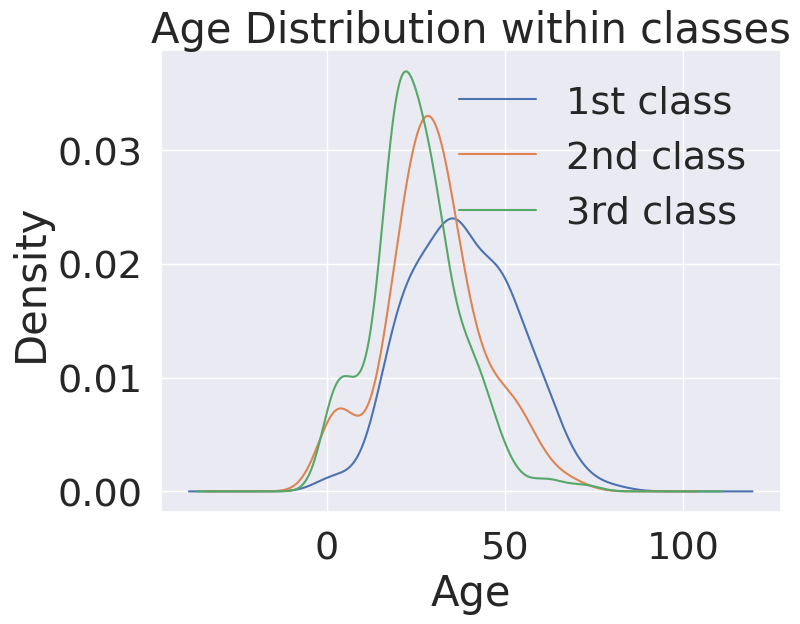

In [92]:
plt.figure(figsize=(8,6))
train['Age'][train['Pclass']==1].plot(kind='kde')
train['Age'][train['Pclass']==2].plot(kind='kde')
train['Age'][train['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class','2nd class','3rd class'])

클래스 별로 나이가 어떻게 분포되는지 확인하기 위함. Class가 높을 수록 나이가 많아진다는 것을 확인할 수 있습니다.

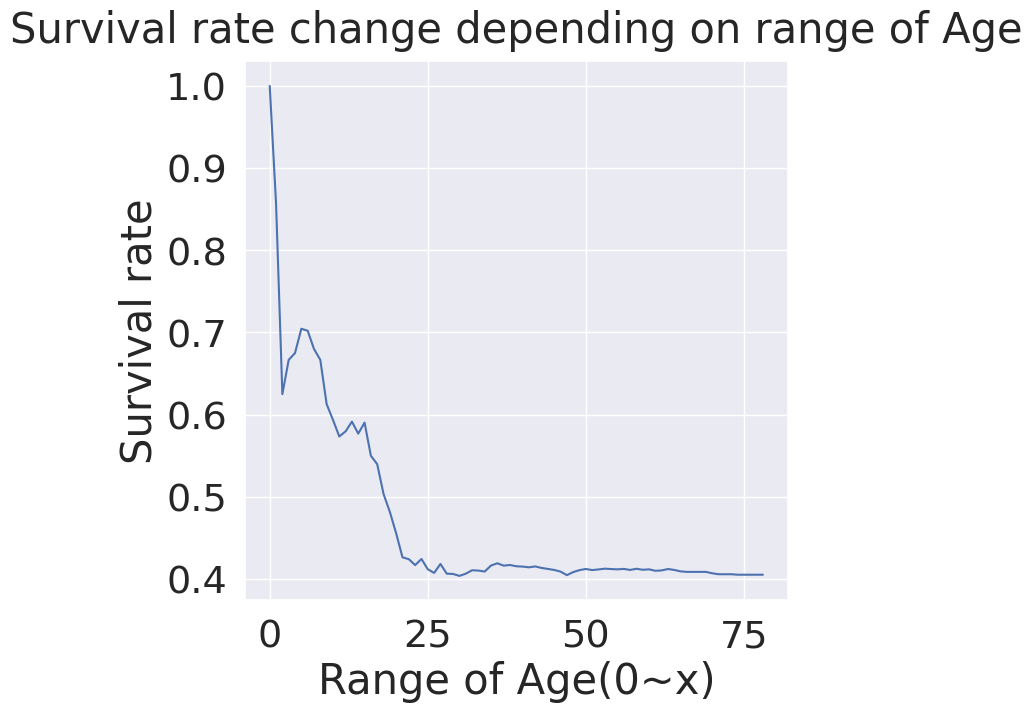

In [96]:
# 나이가 변함에 따라 생존률이 어떻게 변화하는지 확인한다.
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / (train[train['Age'] < i]['Survived'].count()))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

### Feature 분석
> 나이가 어릴 수록, 생존 확률이 높았다. 중요한 feature로 작용할 수 있다.

# 2.5 Pclass, Sex, Age
> 지금까지 확인한 모든 feature에 대한 생존률의 관계를 알아보자.

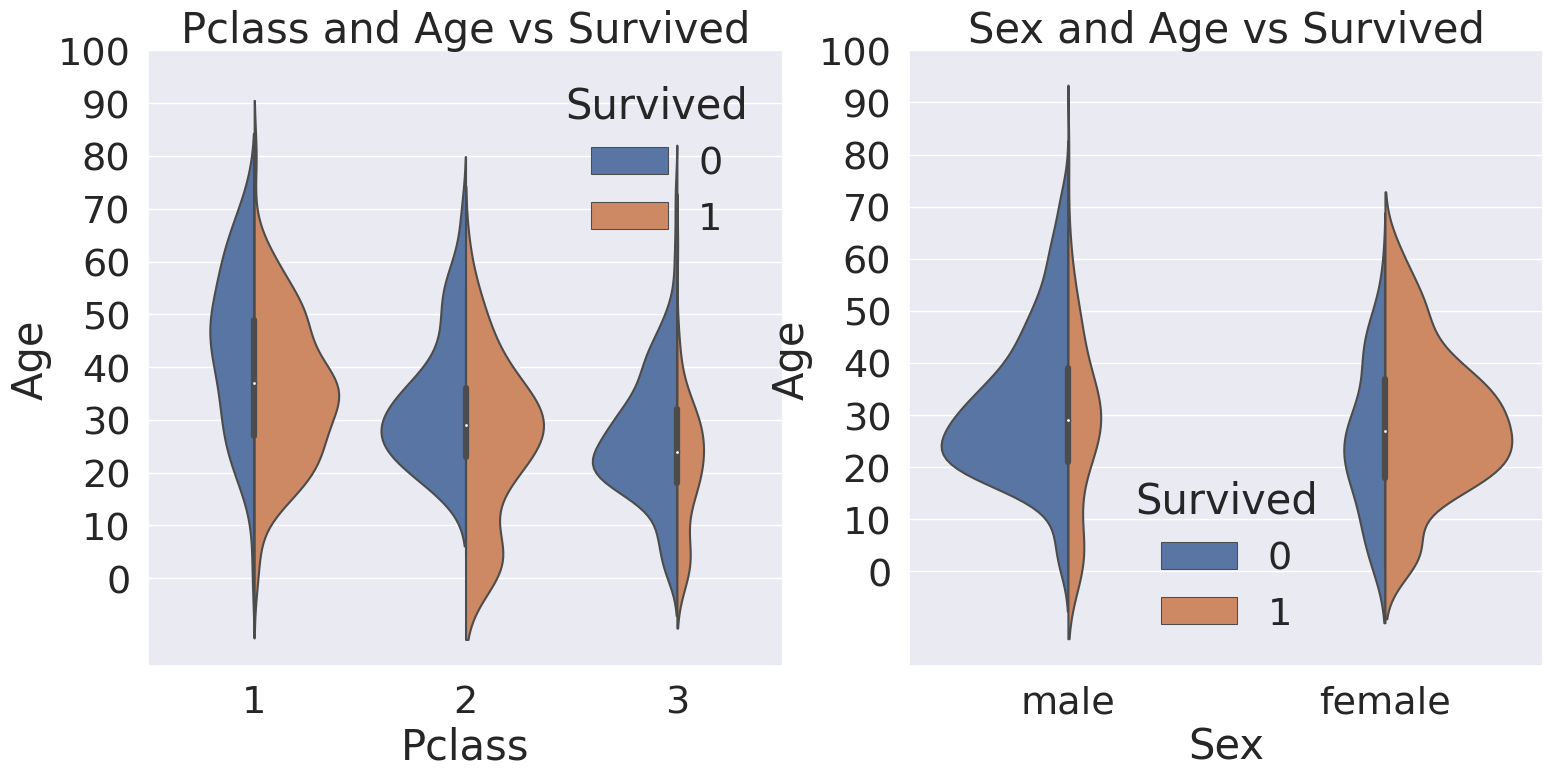

In [109]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot(x="Pclass",y="Age", hue="Survived", data=train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x="Sex",y="Age", hue="Survived", data=train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

* violinplot
    * scale : 'count'는 실제 개수에 따른 변화를, area는 공간은 같으므로 조금 분포를 알 수 있음.

### Feature 분석
> 모든 클래스에서 어릴 수록 생존확률이 높아진다. 또한 여성의 생존률이 높은 것을 보아, 여성과 아이를 먼저 챙겼다는 것을 알 수 있다.

## 2.6 Embarked

<AxesSubplot: xlabel='Embarked'>

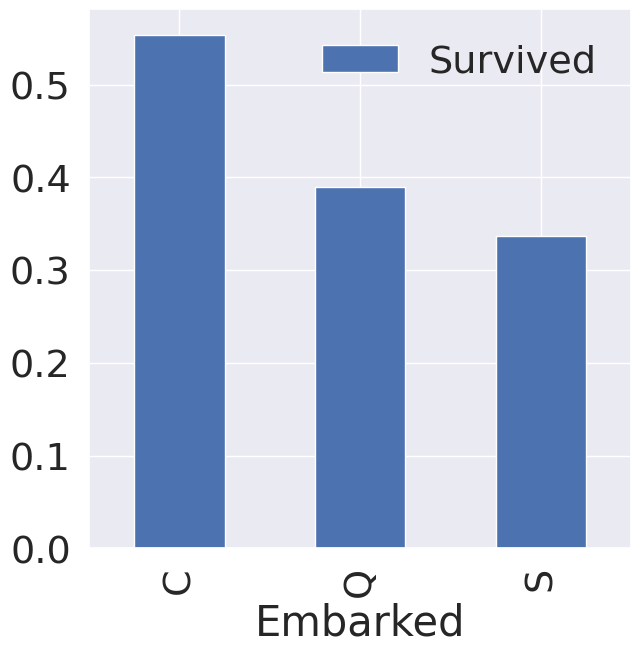

In [112]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

### Feature 분석
> 거의 생존 확률이 비슷하지만, C에서 가장 높다는 것을 확인할 수 있다. 일단 feature로 사용한 후, 후에 모델을 만들고 얼마나 중요한 역할을 했는지 다시 확인해본다.

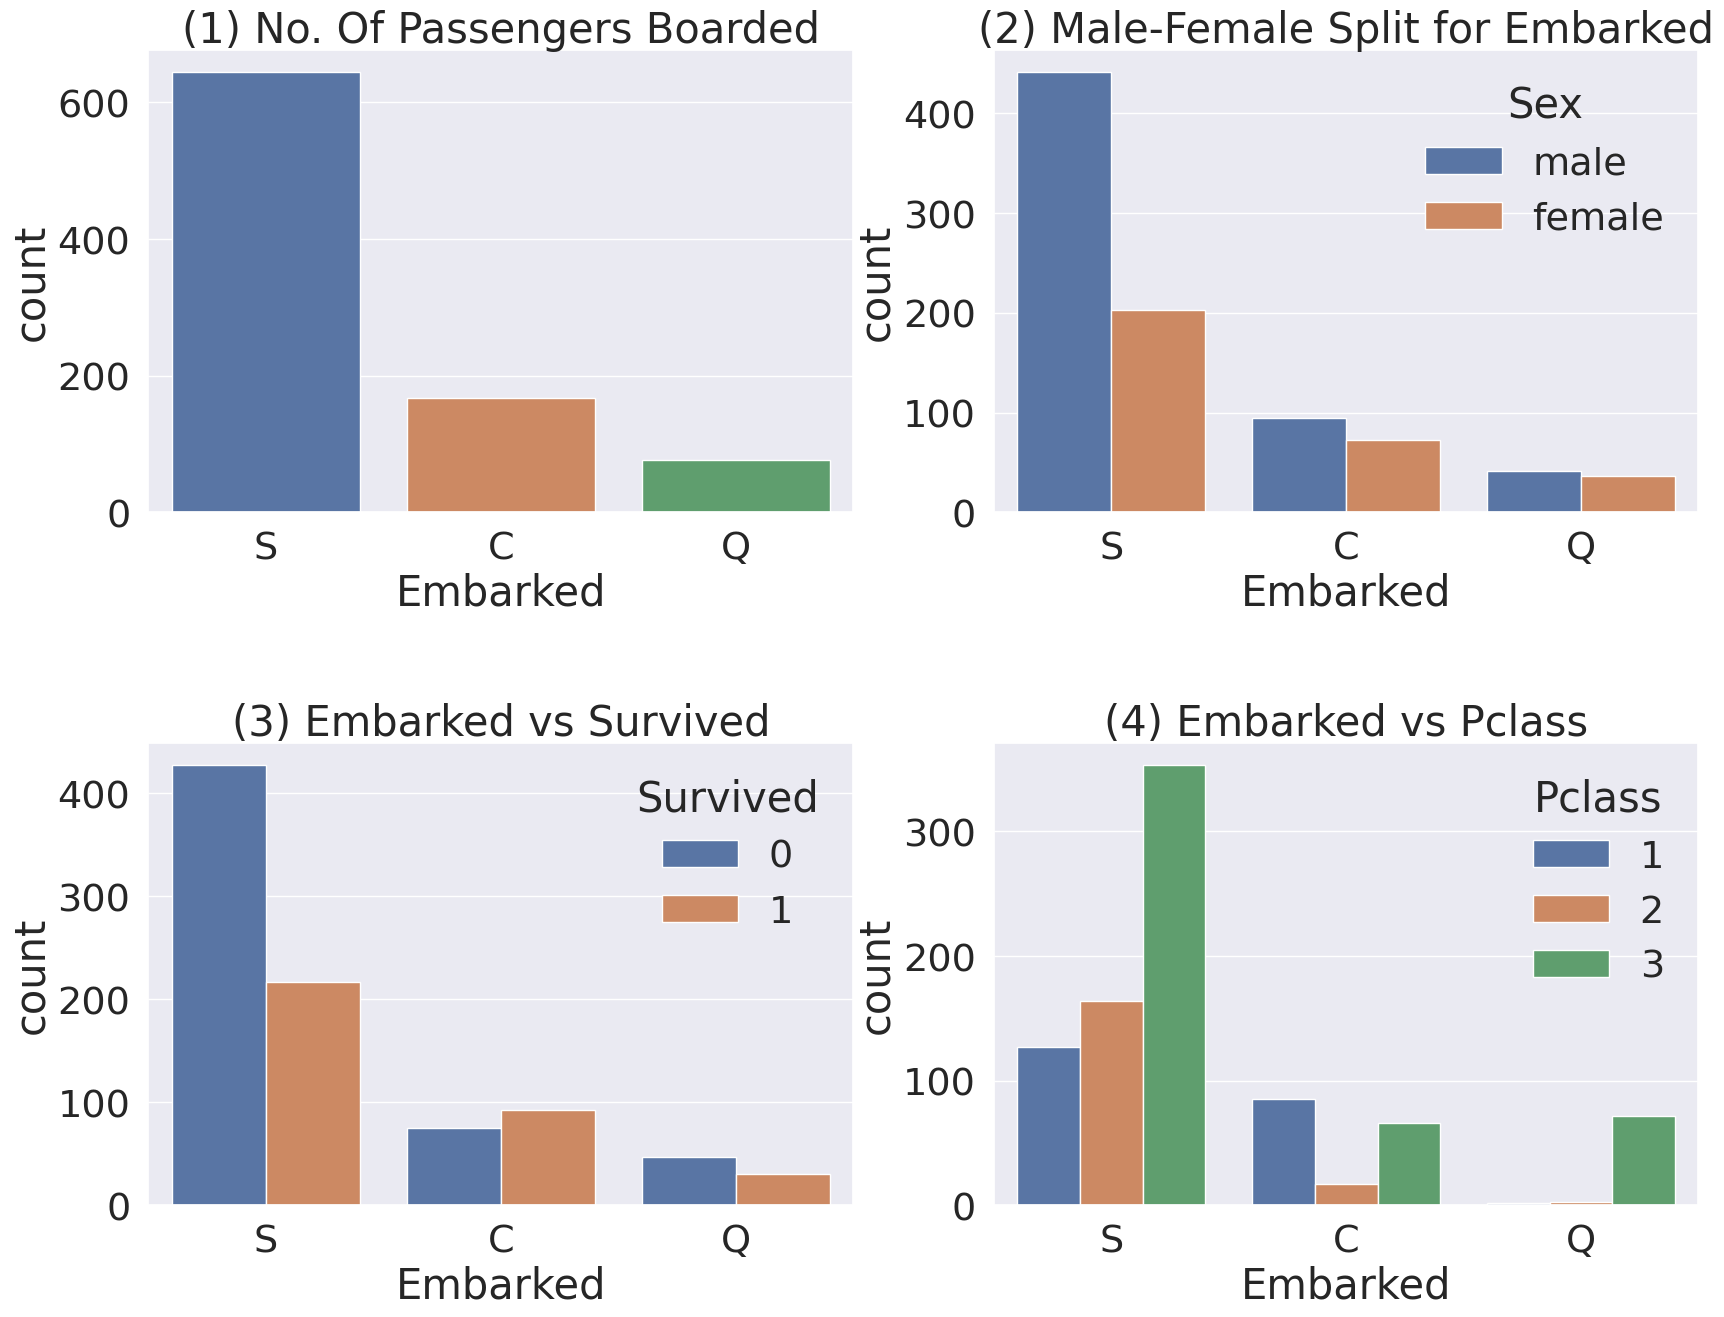

In [115]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass',data=train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.7 Family - SibSp + Parch

In [117]:
#SibSp와 Parch를 묶어 Family라는 새로운 속성 형성
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

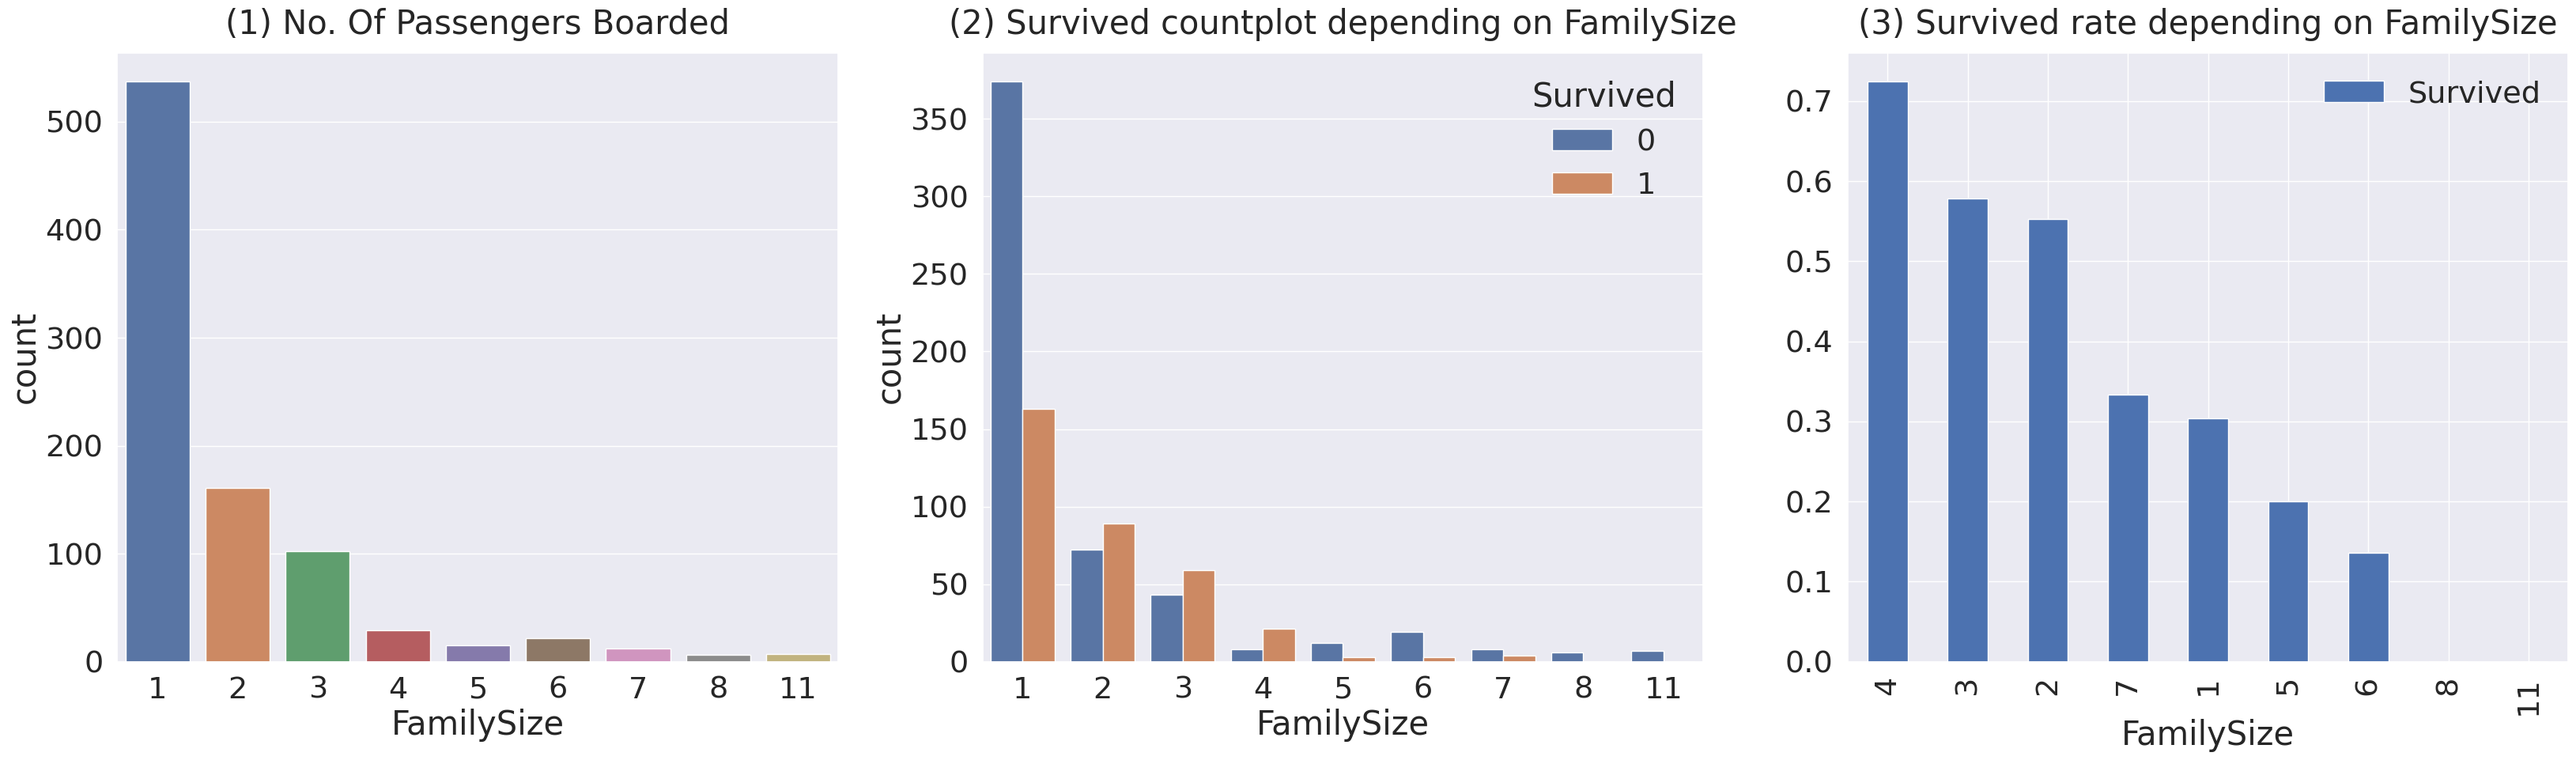

In [127]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Feature 분석
> 혼자온 사람이 가장 많고, 생존확률은 3-4명 선에서 가장 높으며 너무 많아도, 너무 적어도 생족확률이 낮아지는 것을 확인할 수 있다.

## 2.8 Fare

In [141]:
train['Fare'].mean()

1.015737280861013

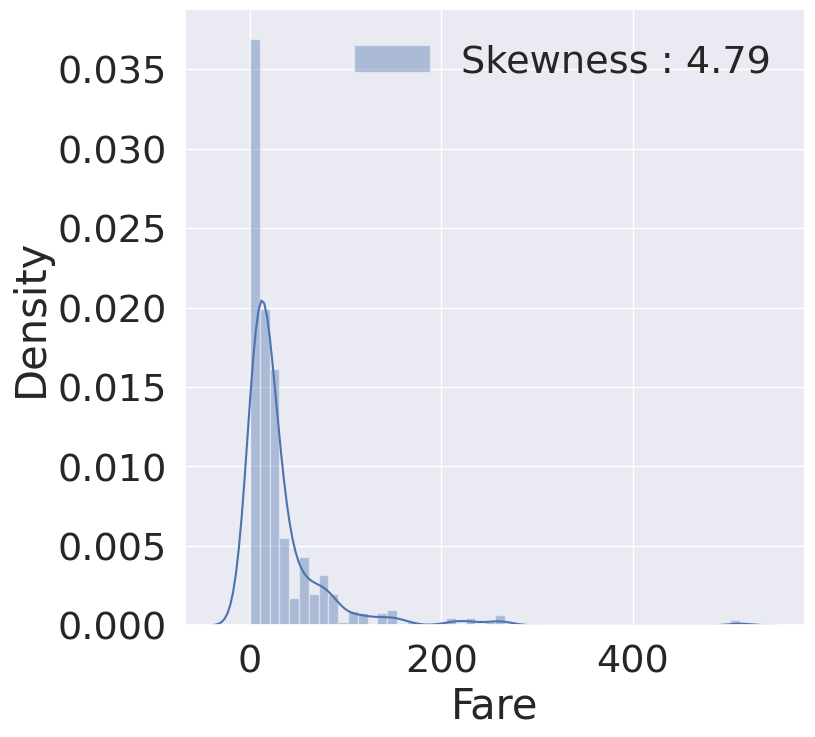

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [138]:
# 아래 줄은 뒤늦게 발견하였습니다. 13번째 강의에 언급되니, 일단 따라치시고 넘어가면 됩니다.
test.loc[test.Fare.isnull(), 'Fare'] = test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

train['Fare'] = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
test['Fare'] = test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

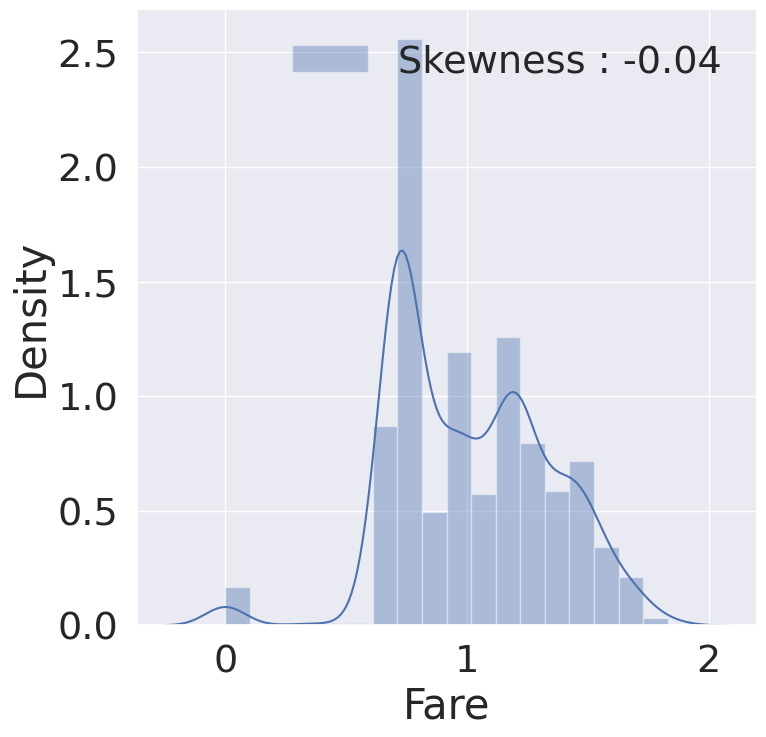

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

### Feature 분석
---
> Fare에 대한 분포가 매우 비대칭적이다. 자칫하면 이상치의 영향에 너무 민감하게 반응하여 정확하지 않은 예측을 할 수 있다. 이러한 분포에 대한 영향을 줄여주기 위해 log 값을 취하는 전처리를 진행한다.

## 2.9 Cabin

In [128]:
for col in train.columns:
    msg=' column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(train[col].isnull().sum()/train[col].shape[0]))

    print(msg)

 column: PassengerId	 Percent of NaN value: 0.00%
 column:   Survived	 Percent of NaN value: 0.00%
 column:     Pclass	 Percent of NaN value: 0.00%
 column:       Name	 Percent of NaN value: 0.00%
 column:        Sex	 Percent of NaN value: 0.00%
 column:        Age	 Percent of NaN value: 19.87%
 column:      SibSp	 Percent of NaN value: 0.00%
 column:      Parch	 Percent of NaN value: 0.00%
 column:     Ticket	 Percent of NaN value: 0.00%
 column:       Fare	 Percent of NaN value: 0.00%
 column:      Cabin	 Percent of NaN value: 77.10%
 column:   Embarked	 Percent of NaN value: 0.22%
 column: FamilySize	 Percent of NaN value: 0.00%


### Feature 분석
---
> 너무 많은 결측값을 갖고 있으므로, 중요한 정보를 얻어내기 쉽지 않다. 모델에 포함시키지 않을 feature!

## 2.10 Ticket

In [129]:
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

### Feature 분석
---
> Ticket의 종류가 너무 다양하고, string data이다. 흠.. Pclass와 관련이 있는 거 같기도 한디 흠흠 지역/ 번호로 구성되어 있기도 하고 번호만 적혀 있기도 하고....